### 나라별 데이타셋

In [25]:
# 1. 데이타 읽어오기
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('./data/countries.tsv', sep='\t')  # 주의 /t은 안됨 - warning
df.head()

# 평균수명, 인구 , gdp

country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106

In [2]:
df.nunique()

country       142
continent       5
year           12
lifeExp      1626
pop          1704
gdpPercap    1704
dtype: int64


> year의 경우 5년단위로 총 12개년도 DataSet

In [3]:
Asia = df[df['continent'] == "Asia"]
Europe = df[df['continent'] == "Europe"]
Africa = df[df['continent'] == "Africa"]
Oceania = df[df['continent'] == "Oceania"]
America = df[df['continent'] == "Americas"]

In [ ]:
year_list = [1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007]
continent_list = ['Asia','Europe','Africa','Oceania','America']
res_array=[]
res1,res2,res3,res4,res5,res_F=[],[],[],[],[],[]


for j in range(len(year_list)):
    a_res = Asia[Asia['year'] == year_list[j]]
    res_mean = a_res['gdpPercap'].mean()
#     print(res_mean)
    res_array.append(res_mean)
#       print(res_array)
#       print(int(res_mean)-int(res_array[j-1]))
    tmp = (int(res_mean)-int(res_array[j-1]))
    res1.append(tmp/res_array[j-1]*100)
    
res_F.append(res1)

for j in range(len(year_list)):
    a_res = Europe[Europe['year'] == year_list[j]]
    res_mean = a_res['gdpPercap'].mean()
    res_array.append(res_mean)
    #   print(res_array)
    #   print(int(res_mean)-int(res_array[j-1]))
    tmp = (int(res_mean)-int(res_array[j-1]))
    res2.append(tmp/res_array[j-1]*100)
    
res_F.append(res2)

for j in range(len(year_list)):
    a_res = Africa[Africa['year'] == year_list[j]]
    res_mean = a_res['gdpPercap'].mean()
    res_array.append(res_mean)
    #   print(res_array)
    #   print(int(res_mean)-int(res_array[j-1]))
    tmp = (int(res_mean)-int(res_array[j-1]))
    res3.append(tmp/res_array[j-1]*100)
    
res_F.append(res3)
                
for j in range(len(year_list)):
    a_res = Oceania[Oceania['year'] == year_list[j]]
    res_mean = a_res['gdpPercap'].mean()
    res_array.append(res_mean)
    #   print(res_array)
    #   print(int(res_mean)-int(res_array[j-1]))
    tmp = (int(res_mean)-int(res_array[j-1]))
    res4.append(tmp/res_array[j-1]*100)
        
res_F.append(res4)
        
for j in range(len(year_list)):
    a_res = America[America['year'] == year_list[j]]
    res_mean = a_res['gdpPercap'].mean()
    res_array.append(res_mean)
    #   print(res_array)
    #   print(int(res_mean)-int(res_array[j-1]))
    tmp = (int(res_mean)-int(res_array[j-1]))
    res5.append(tmp/res_array[j-1]*100)
        
res_F.append(res5)




# res_F

In [176]:
res_F[0]

[0.0,
 11.39451107037825,
 -1.0021194931046176,
 4.223850368346093,
 37.111633867394,
 -4.83665971176995,
 -4.5820255618858186,
 2.340554702248223,
 13.551121262655066,
 13.831514391548161,
 3.4573599191323203,
 22.596614639605303]

<IPython.core.display.Javascript object>


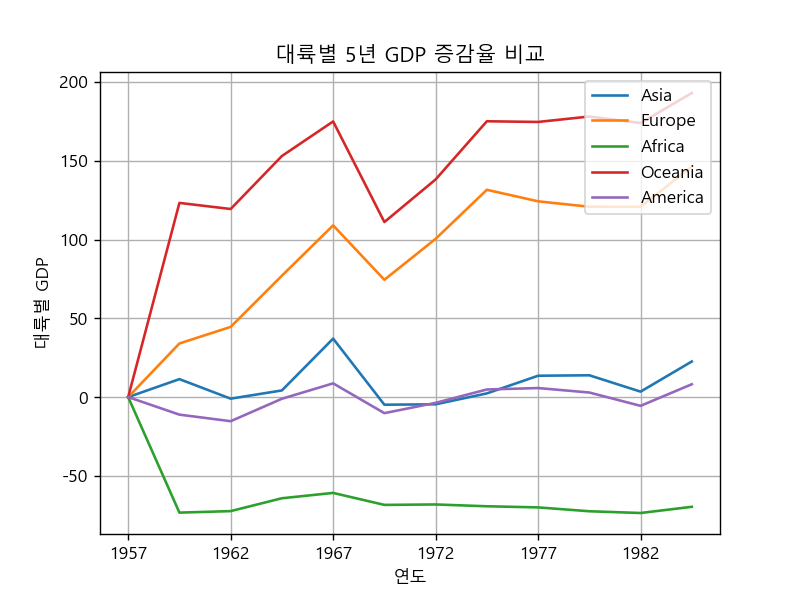

In [82]:
%matplotlib notebook
from matplotlib import font_manager, rc
from matplotlib.widgets import Cursor


plt.rcParams['axes.unicode_minus']=False  # 추가설정 : 폰트를 변경하면 -표시가 ㅁ으로 변경되기에 '-'를 변경하지 않도록 지정
rc('font', family='Malgun Gothic')


se=[]

for i in range(len(res_F)):
    se.append(pd.Series(res_F[i]))

fig = plt.figure()
grap = fig.add_subplot(111)    
    
for i in range(len(se)):
    grap.plot(se[i],label=continent_list[i])#label=continent_list[i]
    grap.legend(loc='upper right')
    
cursor = Cursor(grap, useblit=True, color='red', linewidth=1 ,horizOn=False,vertOn=True)

plt.xlabel("연도") # label 지정시 plt
plt.ylabel("대륙별 GDP")
plt.title("대륙별 5년 GDP 증감율 비교")
grap.set_xticklabels(year_list)
grap.grid(True)

In [183]:
# plotly 라이브러리 사용
import plotly
import plotly.graph_objs as go

trace=[] # data 지정 위한 리스트 생성

for i in range(len(res_F)): # data형식에 맞게 생성하기
    trace.append(go.Scatter(x=year_list,y=res_F[i],name=continent_list[i])) # 범례명 여기서 지정

layout = go.Layout( # layout 지정
    height=500,
    width=1000,
    #paper_bgcolor='rgb(233,233,233)',
    title="대륙별 5년 GDP 증감율",
    xaxis_title='연도',
    yaxis_title="대륙별 GDP 증감율"
)    
    
plotly.offline.plot({ ## 시각화 결과를 local에 저장하기 위해 offline 모듈 사용
    "data": trace, # data는 [go.Scatter(x=, y=] 형식으로 들어가야함
    "layout": layout 
}, auto_open=True)

'temp-plot.html'